In [1]:
# Feb 18 2019
# Shaojun Yu
import pandas
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data
training = pandas.read_csv('HW_1_training.txt', sep='\t')
training_X = training.drop(columns=['Y'])
training_y = training['Y']

testing = pandas.read_csv('HW_1_testing.txt', sep='\t')
testing_X = testing.drop(columns=['Y'])
testing_y = testing['Y']

In [5]:
def euclidean_distance(x1, x2):
    """ Calculates the l2 distance between two vectors """
    distance = 0
    # Squared distance between each coordinate
    for i in range(len(x1)):
        distance += pow((x1[i] - x2[i]), 2)
    return math.sqrt(distance)


def KNN(k,data):
    data = np.array(data)
    y_pred = np.empty(len(data))
    # Determine the class of each sample
    for i in range(len(data)):
        test_sample = data[i]
        idx = np.argsort([euclidean_distance(test_sample, x) for x in np.array(training_X)])[:k]
        k_nearest_neighbors = np.array([np.array(training_y[i]) for i in idx])
        
        #the most common class among the neighbor samples
        counts = np.bincount(k_nearest_neighbors.astype('int'))
        y_pred[i] = counts.argmax()
#         print(counts.argmax())
    return y_pred

### K=1

In [6]:
y_pred = KNN(1, testing_X)
sensitivity = sum([1 for i,y in zip(range(len(testing_y)), testing_y) if y==0 and y_pred[i]==0]) \
/ len(testing_y[testing_y==0])
specificity = sum([1 for i,y in zip(range(len(testing_y)), testing_y) if y==1 and y_pred[i]==1]) \
/ len(testing_y[testing_y==1])
print('sensitivity: ' + str(sensitivity))
print('specificity: ' + str(specificity))

sensitivity: 0.9
specificity: 0.99


### K=5

In [7]:
y_pred = KNN(5, testing_X)
sensitivity = sum([1 for i,y in zip(range(len(testing_y)), testing_y) if y==0 and y_pred[i]==0]) \
/ len(testing_y[testing_y==0])
specificity = sum([1 for i,y in zip(range(len(testing_y)), testing_y) if y==1 and y_pred[i]==1]) \
/ len(testing_y[testing_y==1])
print('sensitivity: ' + str(sensitivity))
print('specificity: ' + str(specificity))

sensitivity: 0.92
specificity: 0.99


### K=10

In [8]:
y_pred = KNN(10, testing_X)
sensitivity = sum([1 for i,y in zip(range(len(testing_y)), testing_y) if y==0 and y_pred[i]==0]) \
/ len(testing_y[testing_y==0])
specificity = sum([1 for i,y in zip(range(len(testing_y)), testing_y) if y==1 and y_pred[i]==1]) \
/ len(testing_y[testing_y==1])
print('sensitivity: ' + str(sensitivity))
print('specificity: ' + str(specificity))

sensitivity: 0.96
specificity: 0.99


### plot

In [9]:
TP = [i for i,y in zip(range(len(testing_y)), testing_y) if y==0 and y_pred[i]==0]
FN = [i for i,y in zip(range(len(testing_y)), testing_y) if y==0 and y_pred[i]==1]
TN = [i for i,y in zip(range(len(testing_y)), testing_y) if y==1 and y_pred[i]==1]
FP = [i for i,y in zip(range(len(testing_y)), testing_y) if y==1 and y_pred[i]==0]

TP = testing_X.iloc[TP,]
FN = testing_X.iloc[FN,]
TN = testing_X.iloc[TN,]
FP = testing_X.iloc[FP,]

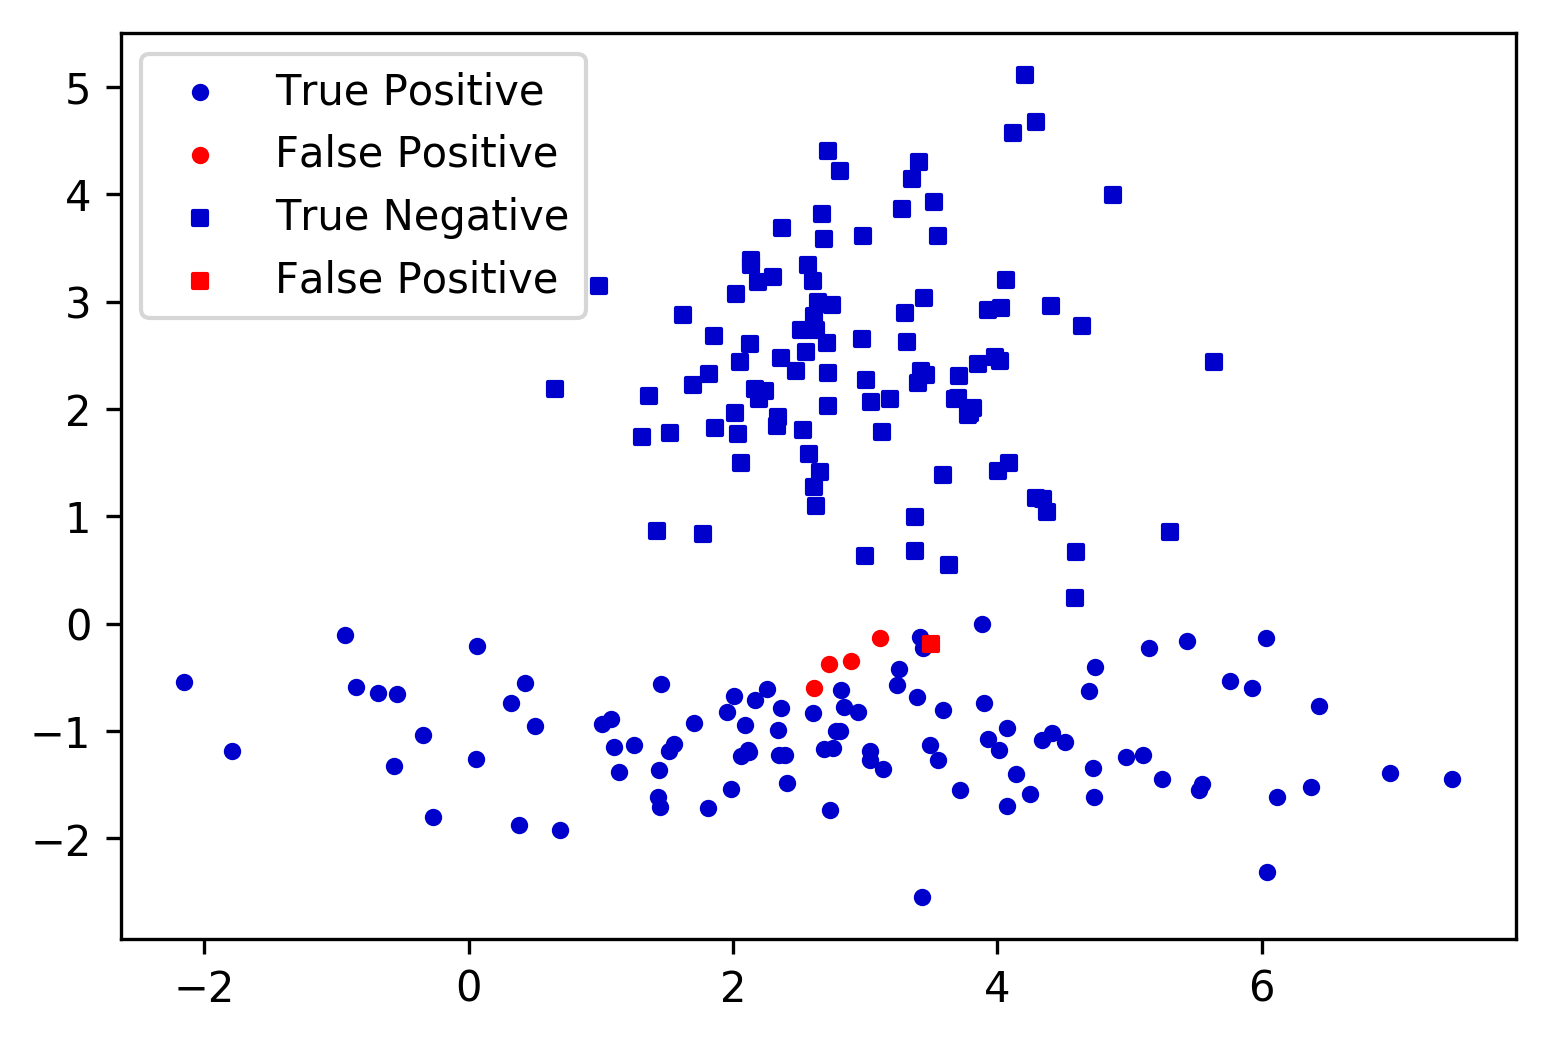

In [10]:
fig = plt.figure(dpi=300)
plt.scatter(TP['X1'],TP['X2'], s=10, c='mediumblue', marker='o',label="True Positive")
plt.scatter(FN['X1'],FN['X2'], s=10, c='red', marker='o', label='False Positive')
plt.scatter(TN['X1'],TN['X2'], s=10, c='mediumblue', marker='s', label='True Negative')
plt.scatter(FP['X1'],FP['X2'], s=10, c='red', marker='s', label='False Positive')
plt.legend()
plt.show()